# Exploratory Data Analysis - Diabetes Risk Prediction

In [20]:
# Initial setup:
import numpy as np 
import pandas as pd 
pd.set_option("display.precision", 2)

import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [69]:
# Seaborn and Matplotlib setup:
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (18,14), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 18,14

In [15]:
# Reading and previewing data:

df = pd.read_csv('./data/diabetes_data_upload.csv')

df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [16]:
df.columns

Index([&#39;Age&#39;, &#39;Gender&#39;, &#39;Polyuria&#39;, &#39;Polydipsia&#39;, &#39;sudden weight loss&#39;,
       &#39;weakness&#39;, &#39;Polyphagia&#39;, &#39;Genital thrush&#39;, &#39;visual blurring&#39;,
       &#39;Itching&#39;, &#39;Irritability&#39;, &#39;delayed healing&#39;, &#39;partial paresis&#39;,
       &#39;muscle stiffness&#39;, &#39;Alopecia&#39;, &#39;Obesity&#39;, &#39;class&#39;],
      dtype=&#39;object&#39;)

In [43]:
# Which gender presents more positive diabetes cases:
df.groupby(['Gender'])['class'].value_counts(normalize=True)

Gender  class   
Female  Positive    0.90
        Negative    0.10
Male    Negative    0.55
        Positive    0.45
Name: class, dtype: float64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x19e05e3d910&gt;

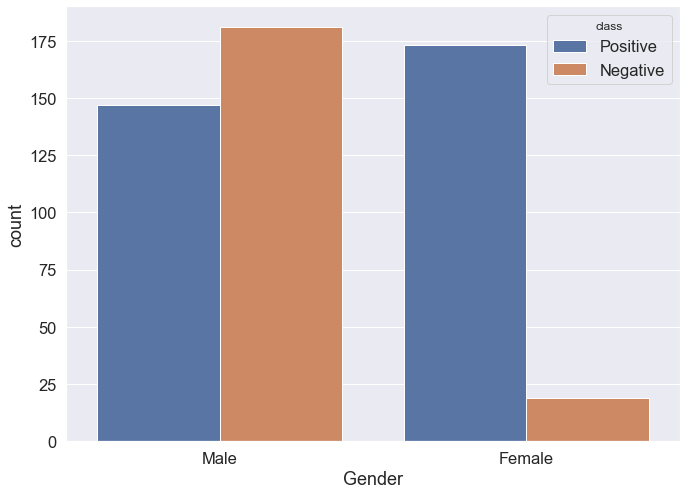

In [52]:
sns.countplot(x='Gender', hue='class', data=df)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x19e0b784310&gt;

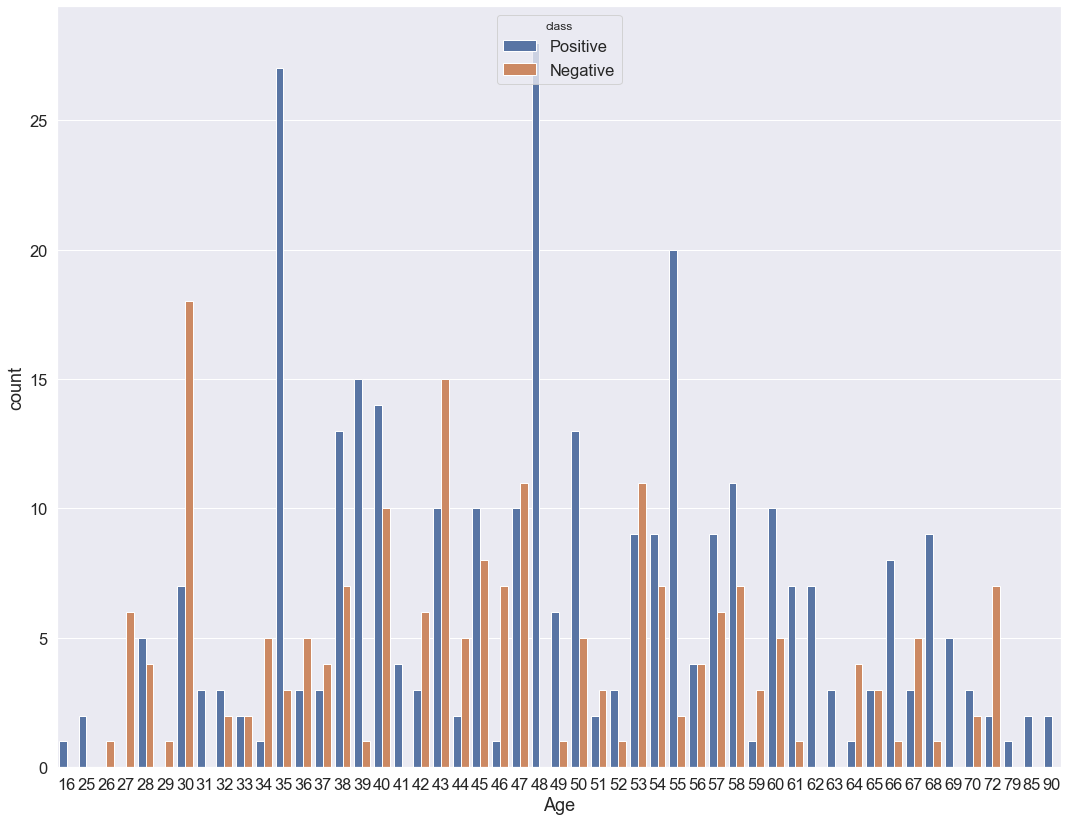

In [91]:
sns.countplot(data=df, x='Age', hue='class')

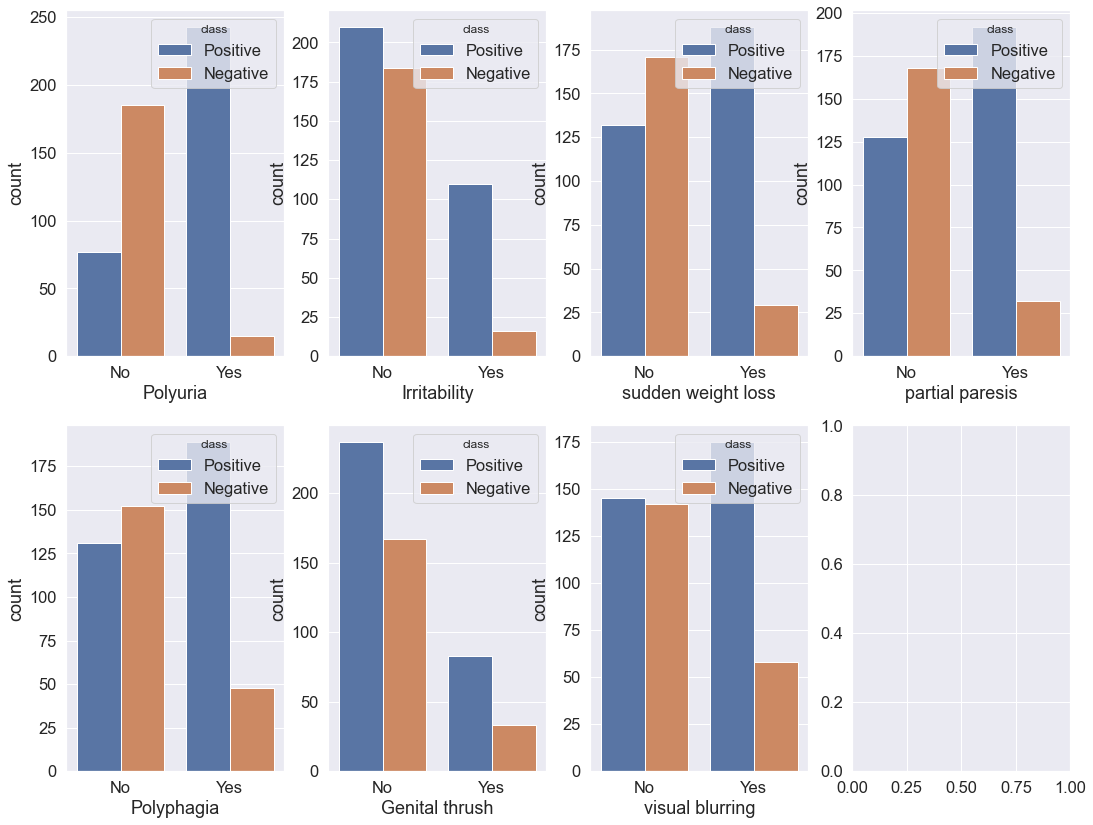

In [78]:
# Plots to assess the relation between features and the diabetes cases:
fig, ax =plt.subplots(2,4)
sns.countplot(data=df, x='Polyuria', hue='class', ax=ax[0,0])
sns.countplot(data=df, x='Irritability', hue='class', ax=ax[0,1])
sns.countplot(data=df, x='sudden weight loss', hue='class',ax=ax[0,2])
sns.countplot(data=df, x='partial paresis', hue='class', ax=ax[0,3])
sns.countplot(data=df, x='Polyphagia', hue='class', ax=ax[1,0])
sns.countplot(data=df, x='Genital thrush', hue='class', ax=ax[1,1])
sns.countplot(data=df, x='visual blurring', hue='class', ax=ax[1,2])
fig.show()

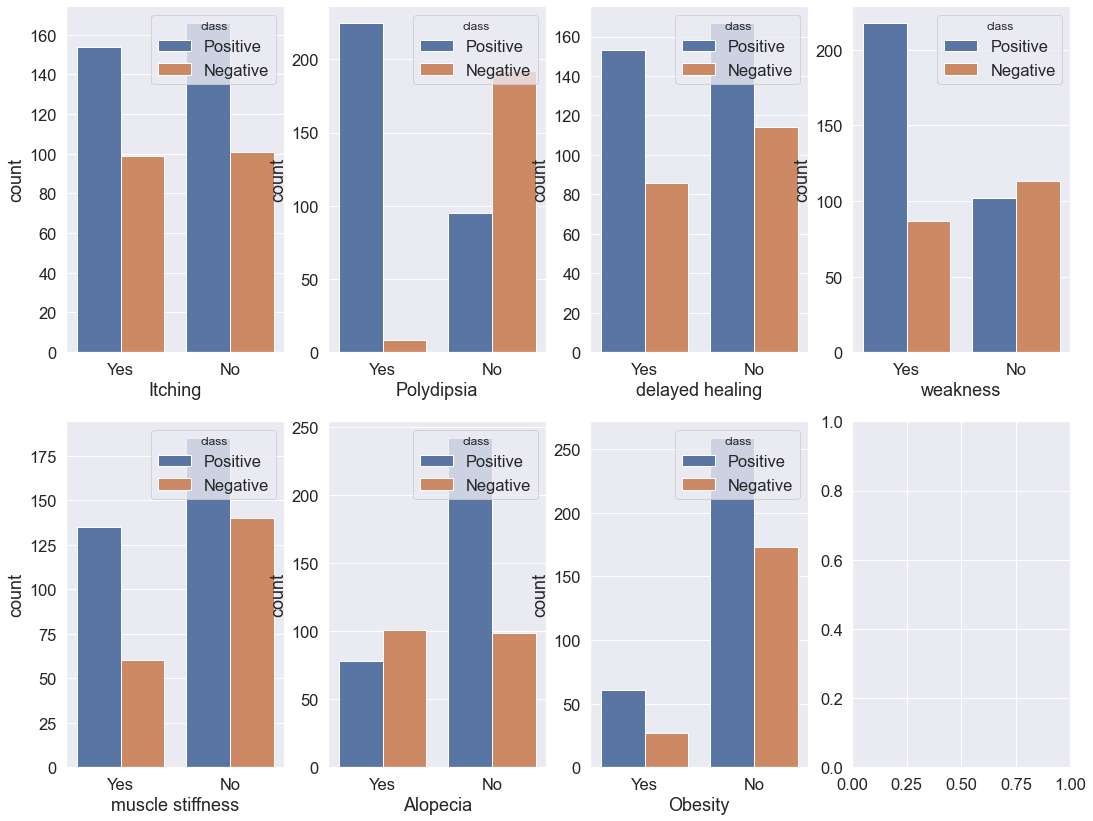

In [77]:
fig, ax =plt.subplots(2,4)
sns.countplot(data=df, x='Itching', hue='class', ax=ax[0,0])
sns.countplot(data=df, x='Polydipsia', hue='class', ax=ax[0,1])
sns.countplot(data=df, x='delayed healing', hue='class', ax=ax[0,2])
sns.countplot(data=df, x='weakness', hue='class', ax=ax[0,3])
sns.countplot(data=df, x='muscle stiffness', hue='class', ax=ax[1,0])
sns.countplot(data=df, x='Alopecia', hue='class', ax=ax[1,1])
sns.countplot(data=df, x='Obesity', hue='class', ax=ax[1,2])
fig.show()

In [88]:
df.groupby(['Gender', 'Alopecia'])['class'].value_counts(normalize=True)

Gender  Alopecia  class   
Female  No        Positive    0.96
                  Negative    0.04
        Yes       Positive    0.52
                  Negative    0.48
Male    No        Negative    0.53
                  Positive    0.47
        Yes       Negative    0.58
                  Positive    0.42
Name: class, dtype: float64

In [89]:
# Most relevant features analyzed:
features = ['Polyuria','Irritability','sudden weight loss','partial paresis','Polyphagia','visual blurring','Polydipsia','weakness','Alopecia']